In [1]:
#Inserting neccesary libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

**Exploring Population Demographics: A Deep Dive into Census Data**

Understanding the demographic makeup of a population is essential for effective policy-making, resource allocation, and social planning. In this case study, we delve into a comprehensive dataset obtained from a population census to gain insights into various demographic factors and trends.

**Data description**
  
The dataset encompasses a wide range of demographic variables, including house number, street, first name, surname, age, relationship to the head of house, gender, marital status, occupation, household size, infirmity and religion. Each record represents an individual respondent, providing a detailed snapshot of the population under study.

## Data Wrangling

In [2]:
# import Datasets
df= pd.read_csv("census.csv")

In [3]:
df

Unnamed: 0 House Number          Street First Name  Surname Age  \
0              0            1  Oaktree Street  Stephanie     Reed  39   
1              1            2  Oaktree Street      Barry     Rowe  26   
2              2            3  Oaktree Street    Pauline  Parsons  22   
3              3            4  Oaktree Street        Ben    Payne  22   
4              4            5  Oaktree Street    Barbara    Jones  60   
...          ...          ...             ...        ...      ...  ..   
8872        8872            1    High Granary      Aaron   Norton  14   
8873        8873            1    High Granary       Toby   Norton  10   
8874        8874            1    High Granary       Ryan   Norton   5   
8875        8875            1    High Granary       Jane   Norton   5   
8876        8876            1    High Granary    Gregory   Norton   2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8872                           Son            NaN    Male   
8873                           Son            NaN    Male   
8874                           Son            NaN    Male   
8875                      Daughter            NaN  Female   
8876                           Son            NaN    Male   

                        Occupation Infirmity   Religion  
0                       Unemployed       NaN        NaN  
1     Engineer, civil (consulting)       NaN        NaN  
2               University Student       NaN        NaN  
3               University Student       NaN        NaN  
4               Surveyor, minerals       NaN  Christian  
...                            ...       ...        ...  
8872                       Student       NaN        NaN  
8873                       Student       NaN        NaN  
8874                       Student       NaN        NaN  
8875                       Student       NaN        NaN  
8876                         Child       NaN        NaN  

[8877 rows x 12 columns]

In [4]:
# Display a summary of the DataFrame including datatype and non-null values for each column.
df.info()
# Print the count of duplicate rows in the DataFrame.
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8877 non-null   int64 
 1   House Number                   8877 non-null   object
 2   Street                         8877 non-null   object
 3   First Name                     8877 non-null   object
 4   Surname                        8877 non-null   object
 5   Age                            8877 non-null   object
 6   Relationship to Head of House  8236 non-null   object
 7   Marital Status                 6668 non-null   object
 8   Gender                         8877 non-null   object
 9   Occupation                     8877 non-null   object
 10  Infirmity                      70 non-null     object
 11  Religion                       3562 non-null   object
dtypes: int64(1), object(11)
memory usage: 832.3+ KB
0


In [5]:
# Drop the 'Unnamed: 0' column from the DataFrame along the specified axis and modify the DataFrame in place.
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df

House Number          Street First Name  Surname Age  \
0               1  Oaktree Street  Stephanie     Reed  39   
1               2  Oaktree Street      Barry     Rowe  26   
2               3  Oaktree Street    Pauline  Parsons  22   
3               4  Oaktree Street        Ben    Payne  22   
4               5  Oaktree Street    Barbara    Jones  60   
...           ...             ...        ...      ...  ..   
8872            1    High Granary      Aaron   Norton  14   
8873            1    High Granary       Toby   Norton  10   
8874            1    High Granary       Ryan   Norton   5   
8875            1    High Granary       Jane   Norton   5   
8876            1    High Granary    Gregory   Norton   2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8872                           Son            NaN    Male   
8873                           Son            NaN    Male   
8874                           Son            NaN    Male   
8875                      Daughter            NaN  Female   
8876                           Son            NaN    Male   

                        Occupation Infirmity   Religion  
0                       Unemployed       NaN        NaN  
1     Engineer, civil (consulting)       NaN        NaN  
2               University Student       NaN        NaN  
3               University Student       NaN        NaN  
4               Surveyor, minerals       NaN  Christian  
...                            ...       ...        ...  
8872                       Student       NaN        NaN  
8873                       Student       NaN        NaN  
8874                       Student       NaN        NaN  
8875                       Student       NaN        NaN  
8876                         Child       NaN        NaN  

[8877 rows x 11 columns]

In [7]:
# describe all columns
df.describe(include = "all")

House Number              Street First Name Surname   Age  \
count          8877                8877       8877    8877  8877   
unique          251                 105        365     638   117   
top               1  Sagittarius Avenue      Paige   Smith    39   
freq            337                 936         40     249   180   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           8236           6668    8877       8877   
unique                            19              9       9       1054   
top                             Head         Single  Female    Student   
freq                            2945           3110    4435       1785   

                  Infirmity   Religion  
count                    70       3562  
unique                    7         16  
top     Physical Disability  Christian  
freq                     23       1926

In [8]:
# Print the list of all column names in the DataFrame 'df'.

df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [9]:
# Count and print the number of missing (null) values in each column of the DataFrame 'df'.

df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     641
Marital Status                   2209
Gender                              0
Occupation                          0
Infirmity                        8807
Religion                         5315
dtype: int64

In [10]:
# Display the unique values in the 'Age' column of the DataFrame 'df'.

df['Age'].unique()

array(['39', '26', '22', '60', '30', '29', '11', '49', '47', '68', '58',
       '18', '53', '12', '55', '17', '16', '52', '45', '69', '71', '40',
       '48', '65', '19', '66', '62', '35', '34', '46', '6', '32', '15',
       '13', '8', '44', '50', '10', '9', '43', '28', '25', '21', '14',
       '54', '56', '0', '41', '5', '4', '61', '42', '7', '2', '20', '38',
       '72', '51', '3', '37', '23', '63', '64', '57', '78', '27', '73',
       '74', '1', '33', '77', '85', '80', '24', '36', '93', '96', '70',
       '67', '31', '81', '79', '89', '59', '83', '76', '86', '82', '84',
       '88', '101', '87', '105', '94', '99', '75', '97', '104', '91',
       '49.77707321', '47.77707321', '73.74774667', '71.74774667',
       '56.24027028', '57.98671889', 'twenty three', '80.9465235',
       '87.9465235', '47.41597341', '48.41597341', '95', '103',
       '73.06402995', '90', '78.60502655', '76.60502655', '70.67699981'],
      dtype=object)

In [11]:
# Replace 'twenty three' which is an obejct with '23' an integer
df['Age'] = df['Age'].replace('twenty three', '23')

In [12]:
# Convert the 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Rounding the float values before converting to Int64
df['Age'] = np.round(df['Age'])

# Converting the rounded values to nullable integer type
df['Age'] = df['Age'].astype('Int64')

print(df['Age'])

0       39
1       26
2       22
3       22
4       60
        ..
8872    14
8873    10
8874     5
8875     5
8876     2
Name: Age, Length: 8877, dtype: Int64


In [13]:
#Check for the unique value of the column "Age"
df['Age'].unique()

<IntegerArray>
[ 39,  26,  22,  60,  30,  29,  11,  49,  47,  68,
 ...
 105,  94,  99,  75,  97, 104,  91,  95, 103,  90]
Length: 102, dtype: Int64

In [14]:
#Check for rows with Age=0
zero_age_df = df[df['Age'] == 0]


In [15]:
# Display the first few rows of the DataFrame where Age is 0
(zero_age_df.head())

House Number            Street First Name   Surname  Age  \
66             8  Bathhouse Avenue      Debra      Webb    0   
81            13  Bathhouse Avenue      Dylan    Dawson    0   
123            6      Barrett Walk  Charlotte  Robinson    0   
231           45      Barrett Walk   Clifford    Walker    0   
376           93      Barrett Walk     Tracey   Hodgson    0   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
66                       Daughter            NaN  Female      Child       NaN   
81                            Son            NaN    Male      Child       NaN   
123                      Daughter            NaN  Female      Child       NaN   
231                           Son            NaN    Male      Child       NaN   
376                      Daughter            NaN  Female      Child       NaN   

    Religion  
66       NaN  
81       NaN  
123      NaN  
231      NaN  
376      NaN

In [16]:
# Check the size of this filtered DataFrame
(f"Number of entries where Age is 0: {len(zero_age_df)}")

'Number of entries where Age is 0: 94'

Zero years old indicates that they are less than a year old

In [17]:
# Define bins
age_bins = [0, 12, 19, 70, float('inf')]  # Use float('inf') to include all higher ages in the last bin
age_labels = ['Child', 'Teenager', 'Adult', 'Senior']

# Categorize the ages using pd.cut()
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the DataFrame to see the results
(df)


House Number          Street First Name  Surname  Age  \
0               1  Oaktree Street  Stephanie     Reed   39   
1               2  Oaktree Street      Barry     Rowe   26   
2               3  Oaktree Street    Pauline  Parsons   22   
3               4  Oaktree Street        Ben    Payne   22   
4               5  Oaktree Street    Barbara    Jones   60   
...           ...             ...        ...      ...  ...   
8872            1    High Granary      Aaron   Norton   14   
8873            1    High Granary       Toby   Norton   10   
8874            1    High Granary       Ryan   Norton    5   
8875            1    High Granary       Jane   Norton    5   
8876            1    High Granary    Gregory   Norton    2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8872                           Son            NaN    Male   
8873                           Son            NaN    Male   
8874                           Son            NaN    Male   
8875                      Daughter            NaN  Female   
8876                           Son            NaN    Male   

                        Occupation Infirmity   Religion Age Group  
0                       Unemployed       NaN        NaN     Adult  
1     Engineer, civil (consulting)       NaN        NaN     Adult  
2               University Student       NaN        NaN     Adult  
3               University Student       NaN        NaN     Adult  
4               Surveyor, minerals       NaN  Christian     Adult  
...                            ...       ...        ...       ...  
8872                       Student       NaN        NaN  Teenager  
8873                       Student       NaN        NaN     Child  
8874                       Student       NaN        NaN     Child  
8875                       Student       NaN        NaN     Child  
8876                         Child       NaN        NaN     Child  

[8877 rows x 12 columns]

In [18]:
#Checking rows with "Age Group"=Senior
df[df['Age Group'] == 'Senior']

House Number             Street First Name      Surname  Age  \
22             16     Oaktree Street     Julian  Kent-Little   71   
116             4       Barrett Walk     Joanna        Booth   72   
159            20       Barrett Walk     Carole         Hill   78   
171            23       Barrett Walk     Victor      Pearson   71   
178            26       Barrett Walk      David       Turner   73   
...           ...                ...        ...          ...  ...   
8733           45         Kelly Lane    Maureen      Collins   71   
8734           45         Kelly Lane     Jeremy      Collins   74   
8763            8        Lomond Lane     Nicole        Moore  103   
8803            1      Waterloo Keep      Allan     Clements   87   
8855            1  Liverpool Granary      Shaun       Hughes   71   

     Relationship to Head of House Marital Status  Gender  \
22                         Husband              M    Male   
116                           Head        Widowed  Female   
159                           Head        Widowed  Female   
171                           Head        Married    Male   
178                           Head       Divorced    Male   
...                            ...            ...     ...   
8733                          Head        Married  Female   
8734                       Husband        Married    Male   
8763                          Head        Widowed  Female   
8803                          Head       Divorced    Male   
8855                          Head        Widowed    Male   

                                   Occupation Infirmity   Religion Age Group  
22                     Retired Radio producer       NaN        NaN    Senior  
116                 Retired Buyer, industrial       NaN  Christian    Senior  
159   Retired Psychotherapist, dance movement       NaN        NaN    Senior  
171             Retired Adult guidance worker       NaN        NaN    Senior  
178            Retired Museum/gallery curator       NaN        NaN    Senior  
...                                       ...       ...        ...       ...  
8733                     Retired Psychiatrist       NaN  Christian    Senior  
8734        Retired Radio broadcast assistant       NaN        NaN    Senior  
8763         Retired Journalist, broadcasting       NaN  Christian    Senior  
8803           Retired Leisure centre manager       NaN   Catholic    Senior  
8855          Retired Engineer, manufacturing       NaN  Christian    Senior  

[574 rows x 12 columns]

In [19]:
#checking for blank values in the column "Surname"

df[df["Surname"] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [20]:
#Unique values of column "Relationship to Head of House"
df['Relationship to Head of House'].unique()

array(['Head', 'Son', 'Daughter', 'Wife', 'Husband', 'Partner', nan,
       'Lodger', 'Visitor', 'Grandson', 'Sibling', 'Granddaughter',
       'Cousin', 'Neice', 'Nephew', 'Adopted Son', 'Step-Son',
       'Adopted Daughter', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [21]:
#checking for blank values in the column "First Name"

df[df["First Name"] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [22]:
# Converting the 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'])

In [23]:
# Checking if there are other people who are 'Head' and aged under 18
df[(df['Age'] < 18) & (df['Relationship to Head of House'] == 'Head')]

House Number              Street First Name  Surname  Age  \
4329           61  Sagittarius Avenue  Geraldine  O'Brien   15   
6597          116          Rice Drive      Julie   Dennis   17   

     Relationship to Head of House Marital Status  Gender  Occupation  \
4329                          Head        Widowed  Female  Unemployed   
6597                          Head        Married  Female     Student   

     Infirmity Religion Age Group  
4329       NaN      NaN  Teenager  
6597       NaN      NaN  Teenager

In [24]:
# Check the household of the Widowed person (having the same "Street" and "House Number") 
df[(df['House Number'] == 61) & (df['Street'] == 'Sagittarius Avenue	')]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [25]:
# Check the household of the Married person (having the same "Street" and "House Number") 
df[(df['House Number'] == 116) & (df['Street'] == 'Rice Drive')]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

Two individuals under the age of 18 are listed as the 'Head' of their households. Since the guideline specifies that a 'Head' should be over 18, we cannot depend on their responses. Therefore, these two households should be excluded from our analysis.







In [26]:
# since there are none, we will Iterate through rows in df to find people who are 'Head' and aged under 18 and remove their housedholds
for indx, row in df.iterrows():
    if (row['Age'] < 18) and (row['Relationship to Head of House'] == 'Head'):
        
        # Use boolean indexing to get the indices to remove
        index_to_remove = df[(df["Street"] == row['Street']) & (df["House Number"] == row['House Number'])].index
        # Drop the rows based on the indices
        df = df.drop(index_to_remove)

# Reset index after dropping rows
df = df.reset_index(drop=True)

In [27]:
#Checking for NaN values
df[df['Relationship to Head of House'].isnull()]

House Number             Street First Name     Surname  Age  \
32             21     Oaktree Street       John     Roberts   19   
98             17   Bathhouse Avenue     Martin     Pearson   21   
99             17   Bathhouse Avenue   Geoffrey      Knight   21   
100            17   Bathhouse Avenue     Marion   Macdonald   22   
102            18   Bathhouse Avenue      Jason       Jones   21   
...           ...                ...        ...         ...  ...   
8826            1  Bumblebee Commune      Barry    Richards   43   
8827            1  Bumblebee Commune    Russell      Arnold   49   
8834            1      Windy Factory      Alice      Hughes   54   
8835            1      Windy Factory   Benjamin  Fitzgerald   23   
8836            1      Windy Factory       Jane   Humphreys   19   

     Relationship to Head of House Marital Status  Gender  \
32                             NaN       Divorced    Male   
98                             NaN         Single    Male   
99                             NaN         Single    Male   
100                            NaN         Single  Female   
102                            NaN         Single    Male   
...                            ...            ...     ...   
8826                           NaN         Single    Male   
8827                           NaN         Single    Male   
8834                           NaN         Single  Female   
8835                           NaN         Single    Male   
8836                           NaN         Single  Female   

                   Occupation Infirmity   Religion Age Group  
32         University Student       NaN        NaN     Adult  
98         University Student       NaN        NaN     Adult  
99         University Student       NaN   Catholic     Adult  
100        University Student       NaN  Christian     Adult  
102        University Student       NaN  Methodist     Adult  
...                       ...       ...        ...       ...  
8826               Unemployed       NaN        NaN     Adult  
8827  Engineer, manufacturing       NaN  Christian     Adult  
8834               Unemployed       NaN  Christian     Adult  
8835          Equities trader       NaN  Methodist     Adult  
8836       University Student       NaN     Muslim     Adult  

[641 rows x 12 columns]

In [28]:
# Fill all the missing values with 'Unknown'
df["Relationship to Head of House"] = df["Relationship to Head of House"].fillna('Unknown')

In [29]:
#Check for the unique values of the column "Marital Status"
df['Marital Status'].unique()

array(['Single', 'Divorced', nan, 'Married', 'Widowed', 'M', 'D', 'S',
       ' ', 'W'], dtype=object)

In [30]:
#checking for blank values in the column "First Name"

df[df['Marital Status'] == ' ']

House Number      Street First Name    Surname  Age  \
1962           14  Inner Pike     Alison  O'Donnell    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
1962                      Daughter                 Female      Child   

     Infirmity Religion Age Group  
1962       NaN      NaN     Child

In [31]:
# Group the DataFrame 'df' by the 'Marital Status' column and store the grouped data in 'grouped'.

grouped = df.groupby('Marital Status')

In [32]:
# Replace all occurrences of 'M' in the 'Marital Status' column with 'Married'.
df['Marital Status'].replace('M', 'Married', inplace=True)

# Replace all occurrences of 'D' in the 'Marital Status' column with 'Divorced'.
df['Marital Status'].replace('D', 'Divorced', inplace=True)

# Replace all occurrences of 'S' in the 'Marital Status' column with 'Single'.
df['Marital Status'].replace('S', 'Single', inplace=True)

# Replace all occurrences of 'W' in the 'Marital Status' column with 'Widowed'.
df['Marital Status'].replace('W', 'Widowed', inplace=True)

# Replace all empty string spaces in the 'Marital Status' column with 'Single'.
df['Marital Status'].replace(' ', 'Single', inplace=True)


In [33]:
#Unique values of Marital Status
df['Marital Status'].unique()

array(['Single', 'Divorced', nan, 'Married', 'Widowed'], dtype=object)

In [34]:
#Checking for NaN values
df[df['Marital Status'].isnull()]

House Number          Street First Name     Surname  Age  \
7               6  Oaktree Street  Josephine  Richardson   11   
14             11  Oaktree Street       Katy    Metcalfe   12   
17             13  Oaktree Street      Maria       Brown   17   
18             13  Oaktree Street   Rosemary       Brown   16   
25             17  Oaktree Street      Laura       Flynn   16   
...           ...             ...        ...         ...  ...   
8866            1    High Granary      Aaron      Norton   14   
8867            1    High Granary       Toby      Norton   10   
8868            1    High Granary       Ryan      Norton    5   
8869            1    High Granary       Jane      Norton    5   
8870            1    High Granary    Gregory      Norton    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
7                         Daughter            NaN  Female    Student   
14                        Daughter            NaN  Female    Student   
17                        Daughter            NaN  Female    Student   
18                        Daughter            NaN  Female    Student   
25                        Daughter            NaN  Female    Student   
...                            ...            ...     ...        ...   
8866                           Son            NaN    Male    Student   
8867                           Son            NaN    Male    Student   
8868                           Son            NaN    Male    Student   
8869                      Daughter            NaN  Female    Student   
8870                           Son            NaN    Male      Child   

     Infirmity Religion Age Group  
7          NaN      NaN     Child  
14         NaN      NaN  Teenager  
17         NaN      NaN  Teenager  
18         NaN      NaN  Teenager  
25         NaN      NaN  Teenager  
...        ...      ...       ...  
8866       NaN      NaN  Teenager  
8867       NaN      NaN     Child  
8868       NaN      NaN     Child  
8869       NaN      NaN     Child  
8870       NaN      NaN     Child  

[2208 rows x 12 columns]

In [35]:
# Fill any missing (NaN) values in the 'Marital Status' column of the DataFrame 'df' with the string 'Single'.
df['Marital Status'] = df['Marital Status'].fillna('Single')

# Display the updated DataFrame to see the results of filling missing values.
df



House Number          Street First Name  Surname  Age  \
0               1  Oaktree Street  Stephanie     Reed   39   
1               2  Oaktree Street      Barry     Rowe   26   
2               3  Oaktree Street    Pauline  Parsons   22   
3               4  Oaktree Street        Ben    Payne   22   
4               5  Oaktree Street    Barbara    Jones   60   
...           ...             ...        ...      ...  ...   
8866            1    High Granary      Aaron   Norton   14   
8867            1    High Granary       Toby   Norton   10   
8868            1    High Granary       Ryan   Norton    5   
8869            1    High Granary       Jane   Norton    5   
8870            1    High Granary    Gregory   Norton    2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8866                           Son         Single    Male   
8867                           Son         Single    Male   
8868                           Son         Single    Male   
8869                      Daughter         Single  Female   
8870                           Son         Single    Male   

                        Occupation Infirmity   Religion Age Group  
0                       Unemployed       NaN        NaN     Adult  
1     Engineer, civil (consulting)       NaN        NaN     Adult  
2               University Student       NaN        NaN     Adult  
3               University Student       NaN        NaN     Adult  
4               Surveyor, minerals       NaN  Christian     Adult  
...                            ...       ...        ...       ...  
8866                       Student       NaN        NaN  Teenager  
8867                       Student       NaN        NaN     Child  
8868                       Student       NaN        NaN     Child  
8869                       Student       NaN        NaN     Child  
8870                         Child       NaN        NaN     Child  

[8871 rows x 12 columns]

In [36]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', 'Widowed'], dtype=object)

In [37]:
filtered_df = df[df['Age'] < 18]

(filtered_df)



House Number          Street First Name     Surname  Age  \
7               6  Oaktree Street  Josephine  Richardson   11   
14             11  Oaktree Street       Katy    Metcalfe   12   
17             13  Oaktree Street      Maria       Brown   17   
18             13  Oaktree Street   Rosemary       Brown   16   
25             17  Oaktree Street      Laura       Flynn   16   
...           ...             ...        ...         ...  ...   
8866            1    High Granary      Aaron      Norton   14   
8867            1    High Granary       Toby      Norton   10   
8868            1    High Granary       Ryan      Norton    5   
8869            1    High Granary       Jane      Norton    5   
8870            1    High Granary    Gregory      Norton    2   

     Relationship to Head of House Marital Status  Gender Occupation  \
7                         Daughter         Single  Female    Student   
14                        Daughter         Single  Female    Student   
17                        Daughter         Single  Female    Student   
18                        Daughter         Single  Female    Student   
25                        Daughter         Single  Female    Student   
...                            ...            ...     ...        ...   
8866                           Son         Single    Male    Student   
8867                           Son         Single    Male    Student   
8868                           Son         Single    Male    Student   
8869                      Daughter         Single  Female    Student   
8870                           Son         Single    Male      Child   

     Infirmity Religion Age Group  
7          NaN      NaN     Child  
14         NaN      NaN  Teenager  
17         NaN      NaN  Teenager  
18         NaN      NaN  Teenager  
25         NaN      NaN  Teenager  
...        ...      ...       ...  
8866       NaN      NaN  Teenager  
8867       NaN      NaN     Child  
8868       NaN      NaN     Child  
8869       NaN      NaN     Child  
8870       NaN      NaN     Child  

[2209 rows x 12 columns]

Since February 2023, the legal marriage age has been increased to 18 years. Consequently, all missing values in the 'Marital Status' column correspond to individuals under 18. Therefore, 'Marital Status' for anyone below 18 years old will be updated to 'Single

In [38]:
# Set marital status to "Single" for individuals with age less than 18
df.loc[df['Age'] < 18, 'Marital Status'] = 'Single'


In [39]:
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                        8801
Religion                         5310
Age Group                           0
dtype: int64

In [40]:
df['Gender'].unique()


array(['Female', 'Male', 'm', 'f', 'female', 'F', 'M', 'male', ' '],
      dtype=object)

In [41]:
# Group the DataFrame 'df' by the 'Gender' column and store the grouped data in 'grouped'.

grouped = df.groupby('Gender')

In [42]:
# Replace all lowercase 'm' entries in the 'Gender' column with 'Male'.
df['Gender'].replace('m', 'Male', inplace=True)

# Replace all lowercase 'f' entries in the 'Gender' column with 'Female'.
df['Gender'].replace('f', 'Female', inplace=True)

# Standardize entries written as 'female' to 'Female' for consistency.
df['Gender'].replace('female', 'Female', inplace=True)

# Replace shorthand 'F' in the 'Gender' column with 'Female'.
df['Gender'].replace('F', 'Female', inplace=True)

# Replace shorthand 'M' in the 'Gender' column with 'Male'.
df['Gender'].replace('M', 'Male', inplace=True)

# Standardize entries written as 'male' to 'Male' for consistency.
df['Gender'].replace('male', 'Male', inplace=True)


In [43]:
df['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [44]:
#checking for blank values in the column "Gender"

df[df['Gender'] == ' ']

House Number         Street First Name Surname  Age  \
2224            3  Chemist Knoll        Kim  Bailey    3   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
2224                      Daughter         Single             Child       NaN   

     Religion Age Group  
2224      NaN     Child

In [45]:
#Replacing the blank value in the column "Gender" to Female since information about this particular row reveals so
df['Gender'].replace(' ', 'Female', inplace=True)


In [46]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [47]:
#Checking for Unique values in column "House Number"
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [48]:
# Replace 'Three' with '3'
df['House Number'] = df['House Number'].replace('Three', '3')

In [49]:
# Convert 'House Number' column to integers
df['House Number'] = pd.to_numeric(df['House Number'], errors='coerce')


In [50]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [51]:
# Filter rows in 'df' where the 'Occupation' column is empty
df[df['Occupation'] == ' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [52]:
#Checking for Unique values in column "Occupation"

df['Occupation'].unique()

array(['Unemployed', 'Engineer, civil (consulting)', 'University Student',
       ..., 'Retired Research officer, government',
       'Retired Radio broadcast assistant',
       'Retired Leisure centre manager'], dtype=object)

In [53]:
# Display unique values
print(df["Occupation"].unique(), "\n")
# Display the count of each unique value, including NaN (dropna=False)
print(df["Occupation"].value_counts(dropna=False))

['Unemployed' 'Engineer, civil (consulting)' 'University Student' ...
 'Retired Research officer, government'
 'Retired Radio broadcast assistant' 'Retired Leisure centre manager'] 

Occupation
Student                                 1784
University Student                       606
Unemployed                               561
Child                                    526
Hotel manager                             16
                                        ... 
Retired Press sub                          1
Retired Garment/textile technologist       1
Retired Copywriter, advertising            1
Retired Bookseller                         1
Retired Leisure centre manager             1
Name: count, Length: 1054, dtype: int64


In [54]:
# Create and add 'Occupation Status' column to df using 'Occupation' column values
df['Occupation Status'] = df['Occupation'].copy()

In [55]:
# Check if 'Retired' is in the 'Ocuppation Status' column
row = df['Occupation Status'].str.contains('Retired', case=False)

# Replace the values based on the condition
df.loc[row, 'Occupation Status'] = 'Retired'

In [56]:
# Categorize all of the persons with a career as Employed
values_to_keep = ['Student', 'Retired', 'University Student', 'Unemployed', 'Child']

df['Occupation Status'] = np.where(df['Occupation Status'].isin(values_to_keep), df['Occupation Status'], 'Employed')

In [57]:
# Count the number of people who are aged over 66 and their occupation status is Unemployed
df[(df['Age'] > 66) & (df['Occupation Status'] == 'Unemployed')].shape[0]

26

In [58]:
# Replace 'Unemployed' value with 'Retired' for people who are aged over 66
df.loc[((df['Age'] > 66) & (df['Occupation'] == 'Unemployed')), 'Occupation'] = 'Retired'
df.loc[((df['Age'] > 66) & (df['Occupation Status'] == 'Unemployed')), 'Occupation Status'] = 'Retired'

In the UK, the official retirement age is set at 66 years. Therefore, individuals who are over 66 years old are no longer classified as 'Unemployed' but are instead categorized as 'Retired'.







In [59]:
df

House Number          Street First Name  Surname  Age  \
0                1  Oaktree Street  Stephanie     Reed   39   
1                2  Oaktree Street      Barry     Rowe   26   
2                3  Oaktree Street    Pauline  Parsons   22   
3                4  Oaktree Street        Ben    Payne   22   
4                5  Oaktree Street    Barbara    Jones   60   
...            ...             ...        ...      ...  ...   
8866             1    High Granary      Aaron   Norton   14   
8867             1    High Granary       Toby   Norton   10   
8868             1    High Granary       Ryan   Norton    5   
8869             1    High Granary       Jane   Norton    5   
8870             1    High Granary    Gregory   Norton    2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8866                           Son         Single    Male   
8867                           Son         Single    Male   
8868                           Son         Single    Male   
8869                      Daughter         Single  Female   
8870                           Son         Single    Male   

                        Occupation Infirmity   Religion Age Group  \
0                       Unemployed       NaN        NaN     Adult   
1     Engineer, civil (consulting)       NaN        NaN     Adult   
2               University Student       NaN        NaN     Adult   
3               University Student       NaN        NaN     Adult   
4               Surveyor, minerals       NaN  Christian     Adult   
...                            ...       ...        ...       ...   
8866                       Student       NaN        NaN  Teenager   
8867                       Student       NaN        NaN     Child   
8868                       Student       NaN        NaN     Child   
8869                       Student       NaN        NaN     Child   
8870                         Child       NaN        NaN     Child   

       Occupation Status  
0             Unemployed  
1               Employed  
2     University Student  
3     University Student  
4               Employed  
...                  ...  
8866             Student  
8867             Student  
8868             Student  
8869             Student  
8870               Child  

[8871 rows x 13 columns]

In [60]:
#Check for the Unique values for the column "Infirmity"
df['Infirmity'].unique()

array([nan, 'Physical Disability', 'Disabled', 'Deaf',
       'Mental Disability', 'Blind', ' ', 'Unknown Infection'],
      dtype=object)

In [61]:
print(df["Infirmity"].unique(),"\n")

# Display the count of each unique value, including NaN (dropna=False)

print(df["Infirmity"].value_counts(dropna=False))

[nan 'Physical Disability' 'Disabled' 'Deaf' 'Mental Disability' 'Blind'
 ' ' 'Unknown Infection'] 

Infirmity
NaN                    8801
Physical Disability      23
Disabled                 11
                         10
Deaf                      9
Mental Disability         8
Unknown Infection         5
Blind                     4
Name: count, dtype: int64


The 'Infirmity' column will be updated to include 'Healthy' for all missing entries, assuming these individuals have no infirmities and simply omitted this detail.







In [62]:
# Replace ' ' and NaN values with 'Healthy'
df["Infirmity"].replace(' ', 'Healthy', inplace = True)
df["Infirmity"].replace(np.nan, 'Healthy', inplace = True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\2969877463.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\2969877463.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [63]:
def disability_status(infirmity):
    # Convert to string to ensure compatibility with the .lower() method
    infirmity = str(infirmity).lower()
    
    # Define non-disabled terms
    non_disabled = ['healthy']
    
    # Determine if the infirmity should be categorized as 'Non-disabled'
    if infirmity in non_disabled:
        return 'Non-disabled'
    else:
        return 'Disabled'

# Apply the categorization function to the 'Infirmity' column
df['Disability Status'] = df['Infirmity'].apply(disability_status)

# Display the DataFrame to check the results
df


House Number          Street First Name  Surname  Age  \
0                1  Oaktree Street  Stephanie     Reed   39   
1                2  Oaktree Street      Barry     Rowe   26   
2                3  Oaktree Street    Pauline  Parsons   22   
3                4  Oaktree Street        Ben    Payne   22   
4                5  Oaktree Street    Barbara    Jones   60   
...            ...             ...        ...      ...  ...   
8866             1    High Granary      Aaron   Norton   14   
8867             1    High Granary       Toby   Norton   10   
8868             1    High Granary       Ryan   Norton    5   
8869             1    High Granary       Jane   Norton    5   
8870             1    High Granary    Gregory   Norton    2   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             Head         Single    Male   
2                             Head         Single  Female   
3                             Head         Single    Male   
4                             Head       Divorced  Female   
...                            ...            ...     ...   
8866                           Son         Single    Male   
8867                           Son         Single    Male   
8868                           Son         Single    Male   
8869                      Daughter         Single  Female   
8870                           Son         Single    Male   

                        Occupation Infirmity   Religion Age Group  \
0                       Unemployed   Healthy        NaN     Adult   
1     Engineer, civil (consulting)   Healthy        NaN     Adult   
2               University Student   Healthy        NaN     Adult   
3               University Student   Healthy        NaN     Adult   
4               Surveyor, minerals   Healthy  Christian     Adult   
...                            ...       ...        ...       ...   
8866                       Student   Healthy        NaN  Teenager   
8867                       Student   Healthy        NaN     Child   
8868                       Student   Healthy        NaN     Child   
8869                       Student   Healthy        NaN     Child   
8870                         Child   Healthy        NaN     Child   

       Occupation Status Disability Status  
0             Unemployed      Non-disabled  
1               Employed      Non-disabled  
2     University Student      Non-disabled  
3     University Student      Non-disabled  
4               Employed      Non-disabled  
...                  ...               ...  
8866             Student      Non-disabled  
8867             Student      Non-disabled  
8868             Student      Non-disabled  
8869             Student      Non-disabled  
8870               Child      Non-disabled  

[8871 rows x 14 columns]

In [64]:
# Display unique values
(df["Religion"].unique(),"\n")

# Display the count of each unique value, including NaN (dropna=False)
(df["Religion"].value_counts(dropna=False))

Religion
NaN            5310
Christian      1926
Catholic        915
Methodist       511
Muslim          106
Sikh             53
Jewish           33
Housekeeper       4
Quaker            3
Agnostic          2
Bahai             2
Baptist           1
                  1
Undecided         1
Nope              1
Buddist           1
Hindu             1
Name: count, dtype: int64

In [65]:
df["Religion"].replace(' ', "No Religion", inplace = True)
df["Religion"].replace(np.nan, "No Religion", inplace = True)
df["Religion"].replace("Nope", "No Religion", inplace = True)


C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\614330805.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\614330805.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [66]:
def categorize_religion(religion):
    # Convert to string and handle potential NaN values 
    religion = str(religion).lower().strip()  # Also strip any accidental leading/trailing whitespace
    
    # Defining non-religious terms
    non_religious = ['none', 'agnostic', 'housekeeper', 'no religion']  # Adjust according to Step 1 findings


    if religion in non_religious:
        return 'Non-religious'
    else:
        return 'Religious'

# Apply the categorization function to the Religion column again
df['Religion Category'] = df['Religion'].apply(categorize_religion)

# Check the results
(df[['Religion', 'Religion Category']])


Religion Religion Category
0     No Religion     Non-religious
1     No Religion     Non-religious
2     No Religion     Non-religious
3     No Religion     Non-religious
4       Christian         Religious
...           ...               ...
8866  No Religion     Non-religious
8867  No Religion     Non-religious
8868  No Religion     Non-religious
8869  No Religion     Non-religious
8870  No Religion     Non-religious

[8871 rows x 2 columns]

In [67]:
# Re-check the first few rows of the DataFrame to ensure the categories are correct
df.head()


House Number          Street First Name  Surname  Age  \
0             1  Oaktree Street  Stephanie     Reed   39   
1             2  Oaktree Street      Barry     Rowe   26   
2             3  Oaktree Street    Pauline  Parsons   22   
3             4  Oaktree Street        Ben    Payne   22   
4             5  Oaktree Street    Barbara    Jones   60   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single  Female   
1                          Head         Single    Male   
2                          Head         Single  Female   
3                          Head         Single    Male   
4                          Head       Divorced  Female   

                     Occupation Infirmity     Religion Age Group  \
0                    Unemployed   Healthy  No Religion     Adult   
1  Engineer, civil (consulting)   Healthy  No Religion     Adult   
2            University Student   Healthy  No Religion     Adult   
3            University Student   Healthy  No Religion     Adult   
4            Surveyor, minerals   Healthy    Christian     Adult   

    Occupation Status Disability Status Religion Category  
0          Unemployed      Non-disabled     Non-religious  
1            Employed      Non-disabled     Non-religious  
2  University Student      Non-disabled     Non-religious  
3  University Student      Non-disabled     Non-religious  
4            Employed      Non-disabled         Religious

In [68]:
df.isnull().sum()


House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Group                        0
Occupation Status                0
Disability Status                0
Religion Category                0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8871 non-null   int64   
 1   Street                         8871 non-null   object  
 2   First Name                     8871 non-null   object  
 3   Surname                        8871 non-null   object  
 4   Age                            8871 non-null   Int64   
 5   Relationship to Head of House  8871 non-null   object  
 6   Marital Status                 8871 non-null   object  
 7   Gender                         8871 non-null   object  
 8   Occupation                     8871 non-null   object  
 9   Infirmity                      8871 non-null   object  
 10  Religion                       8871 non-null   object  
 11  Age Group                      8871 non-null   category
 12  Occupation Status              887

In [70]:
df.describe(include = "all")


House Number              Street First Name Surname        Age  \
count    8871.000000                8871       8871    8871     8871.0   
unique           NaN                 105        365     638       <NA>   
top              NaN  Sagittarius Avenue      Paige   Smith       <NA>   
freq             NaN                 934         40     249       <NA>   
mean       41.478300                 NaN        NaN     NaN  34.815579   
std        50.215674                 NaN        NaN     NaN  21.089278   
min         1.000000                 NaN        NaN     NaN        0.0   
25%         9.000000                 NaN        NaN     NaN       18.0   
50%        22.000000                 NaN        NaN     NaN       34.0   
75%        49.000000                 NaN        NaN     NaN       49.0   
max       250.000000                 NaN        NaN     NaN      105.0   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           8871           8871    8871       8871   
unique                            20              4       2       1055   
top                             Head         Single  Female    Student   
freq                            2943           5319    4653       1784   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity     Religion Age Group Occupation Status Disability Status  \
count       8871         8871      8871              8871              8871   
unique         7           15         4                 6                 2   
top      Healthy  No Religion     Adult          Employed      Non-disabled   
freq        8811         5312      5960              4740              8811   
mean         NaN          NaN       NaN               NaN               NaN   
std          NaN          NaN       NaN               NaN               NaN   
min          NaN          NaN       NaN               NaN               NaN   
25%          NaN          NaN       NaN               NaN               NaN   
50%          NaN          NaN       NaN               NaN               NaN   
75%          NaN          NaN       NaN               NaN               NaN   
max          NaN          NaN       NaN               NaN               NaN   

       Religion Category  
count               8871  
unique                 2  
top        Non-religious  
freq                5318  
mean                 NaN  
std                  NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max                  NaN

In [71]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_census_data.csv', index=False)

df = pd.read_csv('cleaned_census_data.csv')
df

## Exploratory Data Analysis (EDA)

Our analysis begins with exploratory data analysis (EDA), where we explore the distribution, central tendencies, and relationships between various demographic variables. Through visualizations such as histograms, bar plots, and scatter plots, we aim to uncover patterns and trends within the data.

## Distrubution of Data

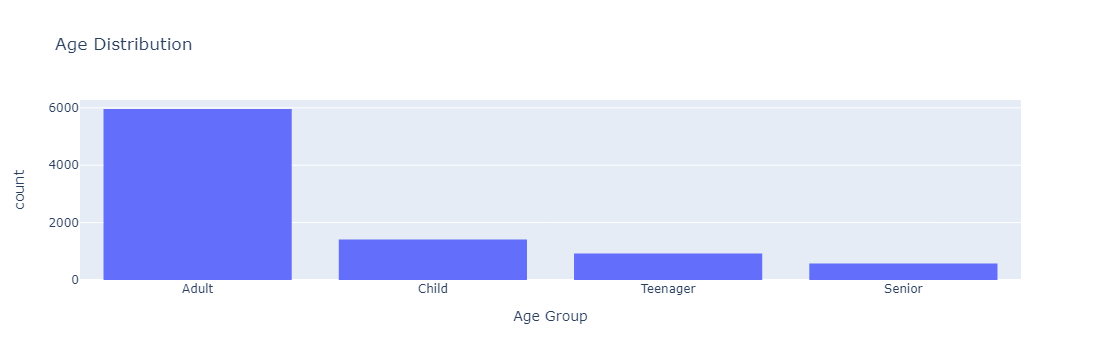

In [72]:
# Creating a histogram plot using Plotly Express
fig = px.histogram(df,           # DataFrame containing the data
                   x='Age Group',   # Column to plot on x-axis
                   nbins=5,         # Number of bins for histogram
                   title='Age Distribution',   # Title of the plot
                   labels={'Age Group': 'Age Group'},   # Customizing axis labels
                   template='plotly')   # Using the 'plotly' template for styling

# Displaying the plot
fig.show()


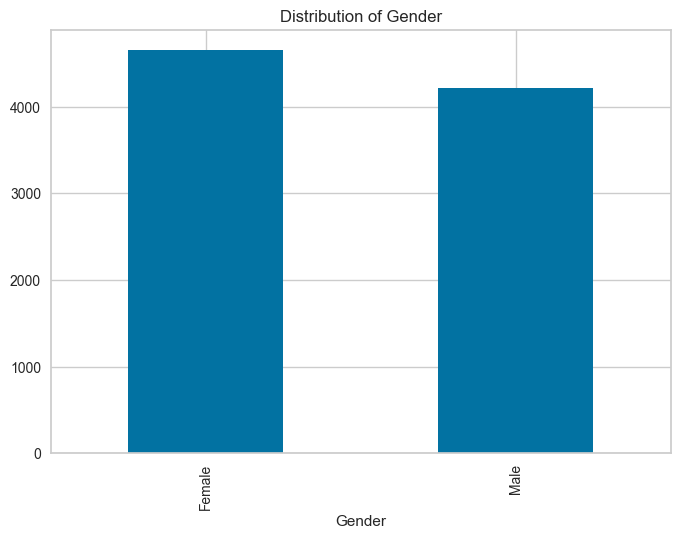

In [73]:
# Plotting the distribution of gender as a bar plot
df['Gender'].value_counts().plot(kind='bar')  

# Adding title to the plot
plt.title('Distribution of Gender')  

# Displaying the plot
plt.show()


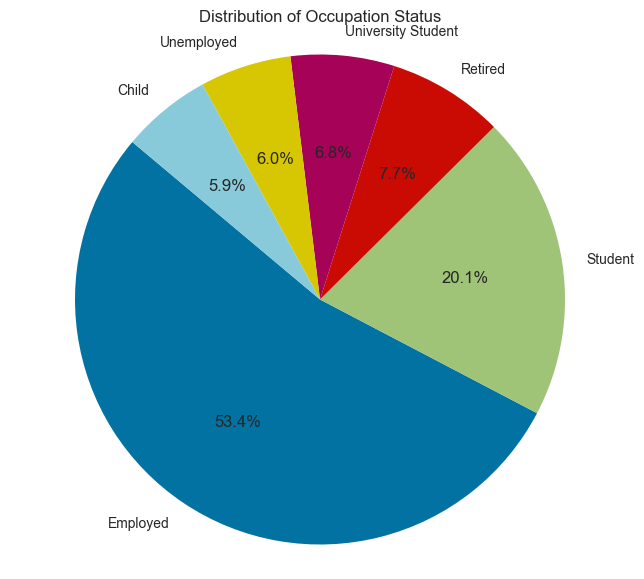

In [74]:
# Count the frequency of each category
category_counts = df['Occupation Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 7)) 
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Occupation Status')  
plt.axis('equal')  

# Show the plot
plt.show()

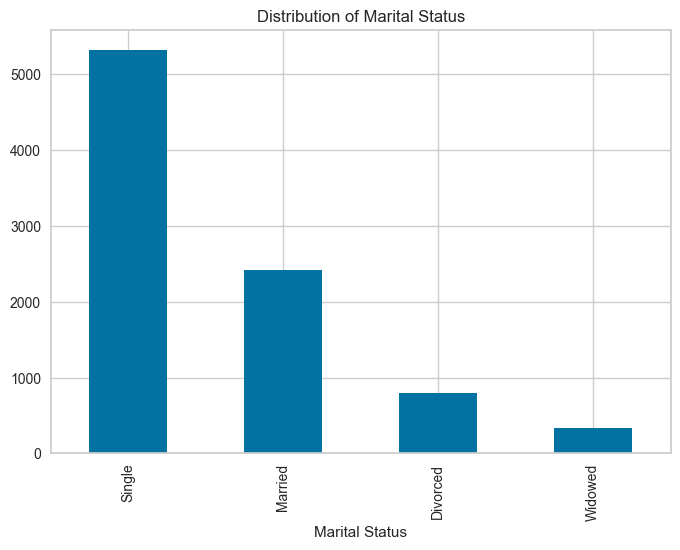

In [75]:
# Plotting the distribution of marital status as a bar plot
df['Marital Status'].value_counts().plot(kind='bar')  

# Adding a title to the plot
plt.title('Distribution of Marital Status')  

# Displaying the plot
plt.show()


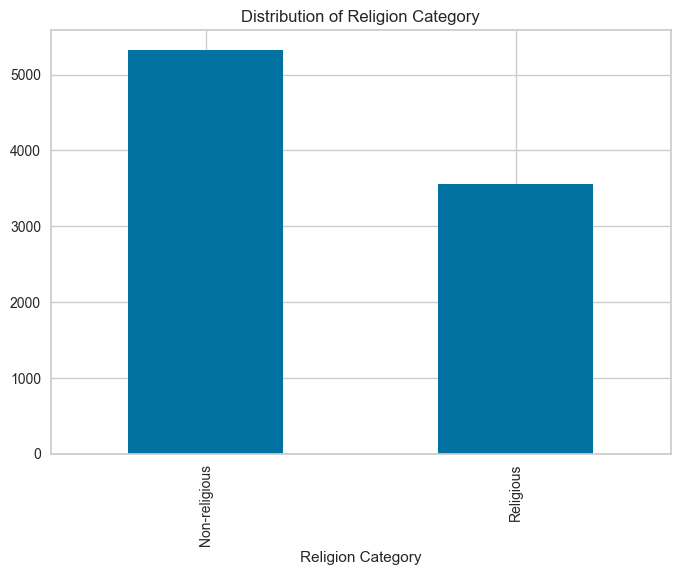

In [76]:
# Plotting the distribution of religion categories as a bar plot
df['Religion Category'].value_counts().plot(kind='bar')  

# Adding a title to the plot
plt.title('Distribution of Religion Category')  

# Displaying the plot
plt.show()


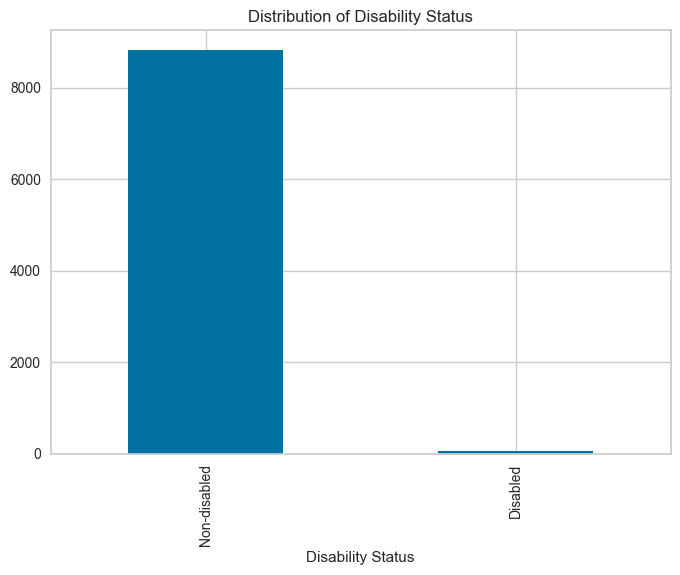

In [77]:
# Plotting the distribution of disability statuses as a bar plot
df['Disability Status'].value_counts().plot(kind='bar')  

# Adding a title to the plot
plt.title('Distribution of Disability Status')  

# Displaying the plot
plt.show()


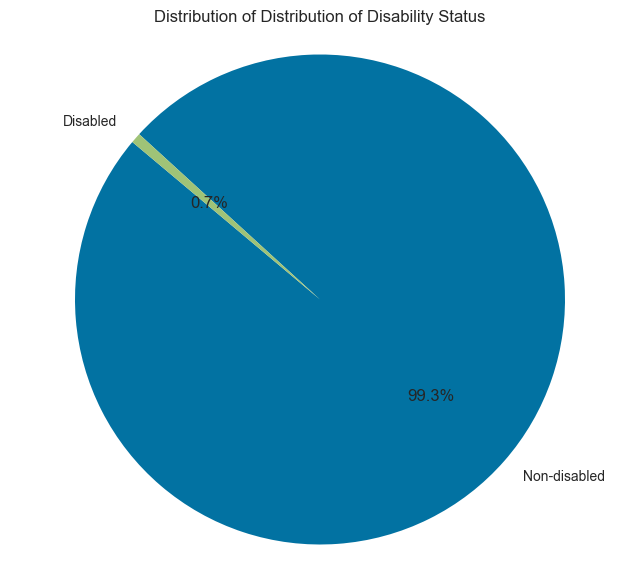

In [78]:
# Count the frequency of each category
category_counts = df['Disability Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 7)) 
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Distribution of Disability Status')  
plt.axis('equal')  

# Show the plot
plt.show()

## Relationships Between Variables

In [79]:
# df_summary will contain the count of each 'Occupation Status' within each 'Age Group'
df_summary = df.groupby(['Age Group', 'Occupation Status']).size().reset_index(name='Count')


C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\475260044.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\boluw\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



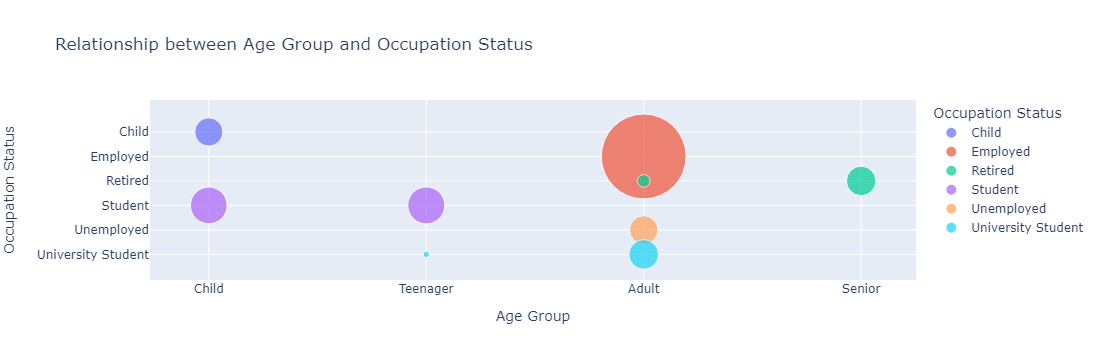

In [80]:
fig = px.scatter(
    df_summary,                        
    x="Age Group",                     
    y="Occupation Status",             
    size="Count",                      
    color="Occupation Status",         
    hover_name="Count",                
    size_max=60,                       
    title="Relationship between Age Group and Occupation Status",  
    labels={'Age Group': 'Age Group', 'Occupation Status': 'Occupation Status'}  
)

# Display the plot
fig.show()


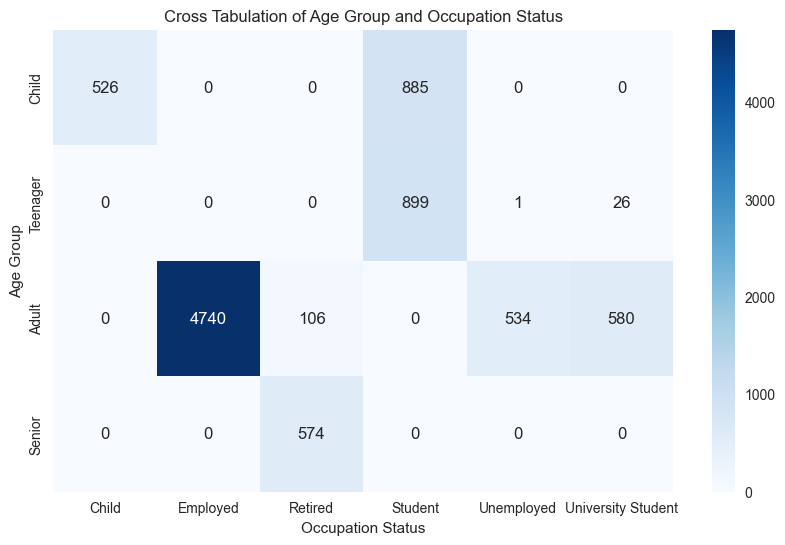

In [81]:
# Creating a cross-tabulation table
ctab = pd.crosstab(df['Age Group'], df['Occupation Status'])

# Plotting using seaborn
plt.figure(figsize=(10, 6))  # Set the size of the figure
ax = sns.heatmap(ctab, annot=True, cmap="Blues", fmt='d') 
ax.set_title('Cross Tabulation of Age Group and Occupation Status')  
plt.xlabel('Occupation Status')  
plt.ylabel('Age Group') 
plt.show()

In [82]:
# Filter the DataFrame for rows where Age Group is 'Teenager' and Occupation Status is 'Unemployed'
teen_unemployed = df[(df['Age Group'] == 'Teenager') & (df['Occupation Status'] == 'Unemployed')]

# Display the filtered DataFrame
(teen_unemployed)


House Number         Street First Name Surname  Age  \
2235             6  Chemist Knoll      Katie  Thomas   18   

     Relationship to Head of House Marital Status  Gender  Occupation  \
2235                          Head         Single  Female  Unemployed   

     Infirmity     Religion Age Group Occupation Status Disability Status  \
2235   Healthy  No Religion  Teenager        Unemployed      Non-disabled   

     Religion Category  
2235     Non-religious

In [83]:
# Create a DataFrame 'df_occupation' containing only the 'Age Group' and 'Occupation Status' columns from the original DataFrame
df_occupation = df[['Age Group', 'Occupation Status']]

# Group the DataFrame by 'Age Group' and 'Occupation Status', counting the occurrences of each combination
grouped = df_occupation.groupby(['Age Group', 'Occupation Status']).size().reset_index(name='Count')

# Pivot the grouped DataFrame to rearrange the data, with 'Age Group' as rows, 'Occupation Status' as columns, and 'Count' as values
grouped_occupation = grouped.pivot_table(index='Age Group', columns='Occupation Status', values='Count', fill_value=0)

# Reset the index to make 'Age Group' a regular column again
grouped_occupation = grouped_occupation.reset_index(drop=False)

# Rename the columns to improve clarity
grouped_occupation.columns = [col for col in grouped_occupation.columns]

# Display the resulting DataFrame showing the count of each 'Occupation Status' for each 'Age Group'
grouped_occupation


C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\2985350996.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\boluw\AppData\Local\Temp\ipykernel_11656\2985350996.py:8: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Age Group  Child  Employed  Retired  Student  Unemployed  University Student
0     Child  526.0       0.0      0.0    885.0         0.0                 0.0
1  Teenager    0.0       0.0      0.0    899.0         1.0                26.0
2     Adult    0.0    4740.0    106.0      0.0       534.0               580.0
3    Senior    0.0       0.0    574.0      0.0         0.0                 0.0

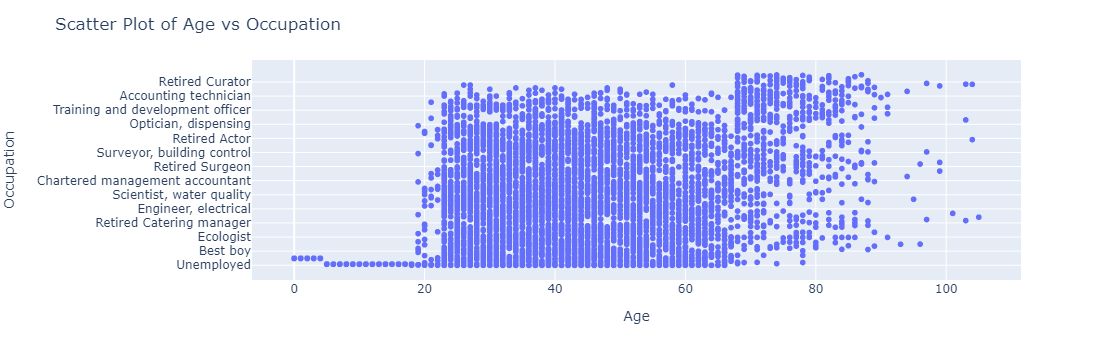

In [84]:
# Create a scatter plot using Plotly Express, with age on the x-axis and occupation on the y-axis
fig = px.scatter(df, x="Age", y="Occupation")

# Add labels and title to the plot
fig.update_layout(
    title='Scatter Plot of Age vs Occupation',
    xaxis_title='Age',
    yaxis_title='Occupation'
)

# Display the plot using the Plotly template
Template=('plotly')
fig.show()


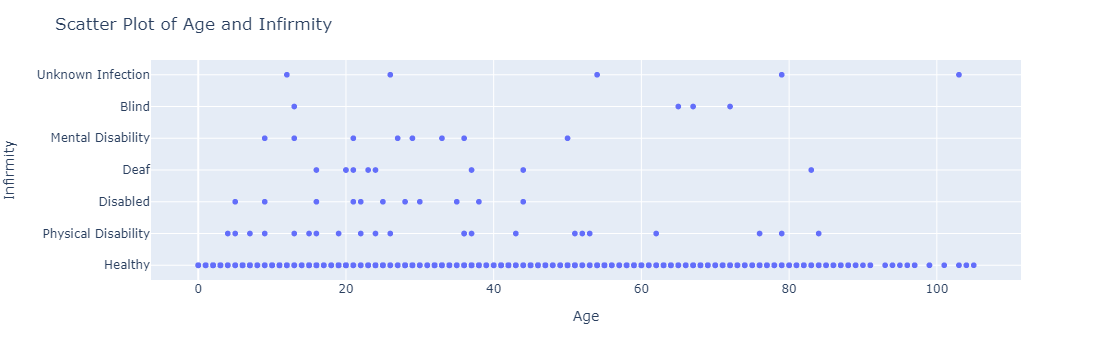

In [85]:
# Create a scatter plot using Plotly Express, with 'Age' on the x-axis and 'Infirmity' on the y-axis
fig = px.scatter(df, x="Age", y="Infirmity")

# Add labels and title to the plot
fig.update_layout(
    title="Scatter Plot of Age and Infirmity",
    xaxis_title="Age",
    yaxis_title="Infirmity",
    template='plotly'  # Set the plot template
)

# Display the scatter plot
fig.show()


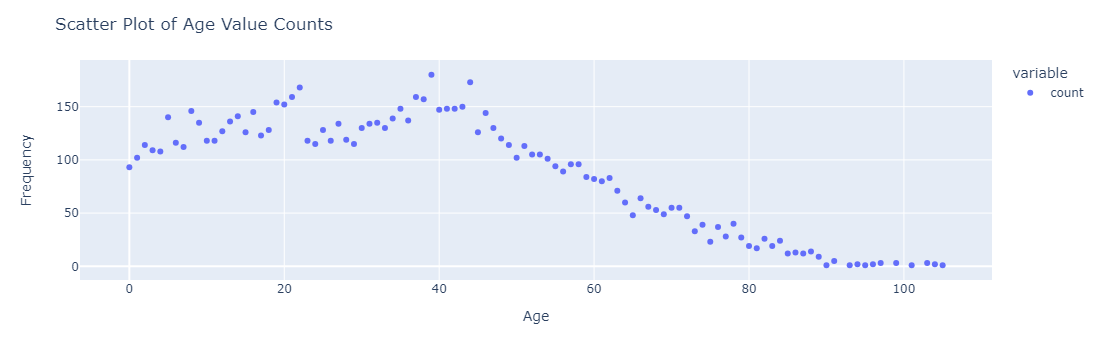

In [86]:
# Create a scatter plot using Plotly Express with the value counts of 'Age'
fig = px.scatter(df['Age'].value_counts())

# Add labels and title to the plot
fig.update_layout(
    title="Scatter Plot of Age Value Counts",
    xaxis_title="Age",
    yaxis_title="Frequency",
    template='plotly'  # Set the plot template
)

# Display the scatter plot
fig.show()


In [87]:
# Bin the age data
age_bins = [0, 12, 19, 70, 110]
age_labels = ['0-12', '13-17', '18-65', '66-110']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a pivot table
pivot_table = pd.crosstab(df['Age Group'], df['Infirmity'])

# Print the pivot table
(pivot_table)

Infirmity  Blind  Deaf  Disabled  Healthy  Mental Disability  \
Age Group                                                      
0-12           0     0         2     1404                  1   
13-17          1     1         1      918                  1   
18-65          2     7         8     5922                  6   
66-110         1     1         0      567                  0   

Infirmity  Physical Disability  Unknown Infection  
Age Group                                          
0-12                         4                  0  
13-17                        3                  1  
18-65                       13                  2  
66-110                       3                  2

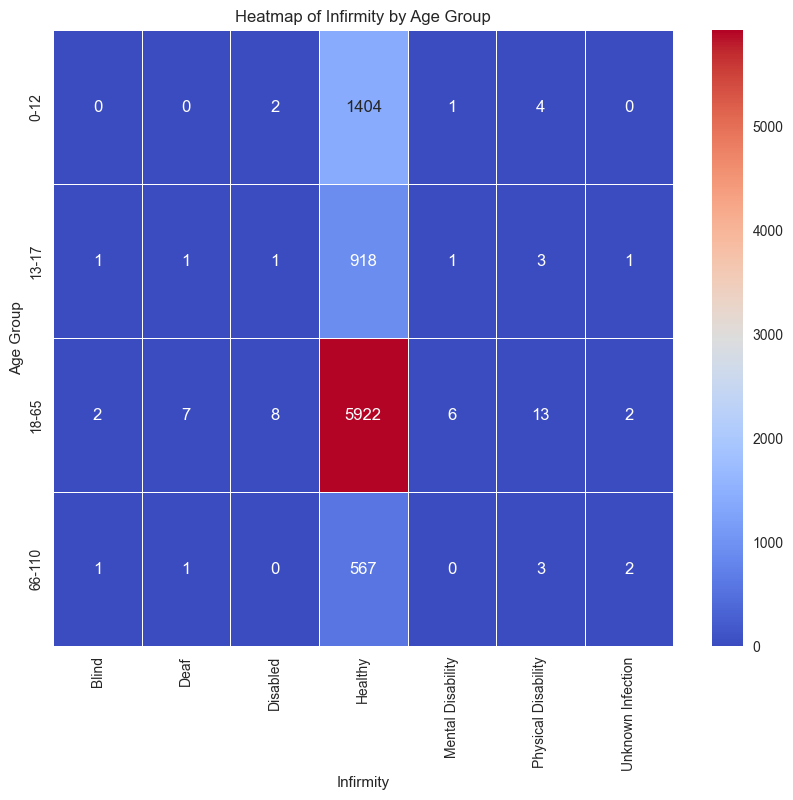

In [88]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='coolwarm', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Infirmity by Age Group')
plt.xlabel('Infirmity')
plt.ylabel('Age Group')

# Show the plot
plt.show()

In [89]:
# Create an empty dictionary
Marital_stat = {}
# Iterate through unique values in the 'Marital Status' column of 'df'
for Marital in df["Marital Status"].unique():
    # Calculate and store descriptive statistics for the 'Age' column for each marital status
    Marital_stat[Marital] = df[df["Marital Status"] == Marital]["Age"].describe()

# Create a DataFrame 'Marital_stats' from the dictionary
Marital_stats = pd.DataFrame(Marital_stat)
# Display 'Marital_stats'
Marital_stats

Single   Divorced    Married    Widowed
count     5319.0      798.0     2422.0      332.0
mean   25.517202  40.250627  49.521883  63.436747
std    17.851705  16.493711  16.043085  19.899268
min          0.0       18.0       18.0       18.0
25%         11.0       26.0       38.0       47.0
50%         22.0       37.0       47.0       69.0
75%         39.0       51.0       60.0       77.0
max         97.0      101.0      104.0      105.0

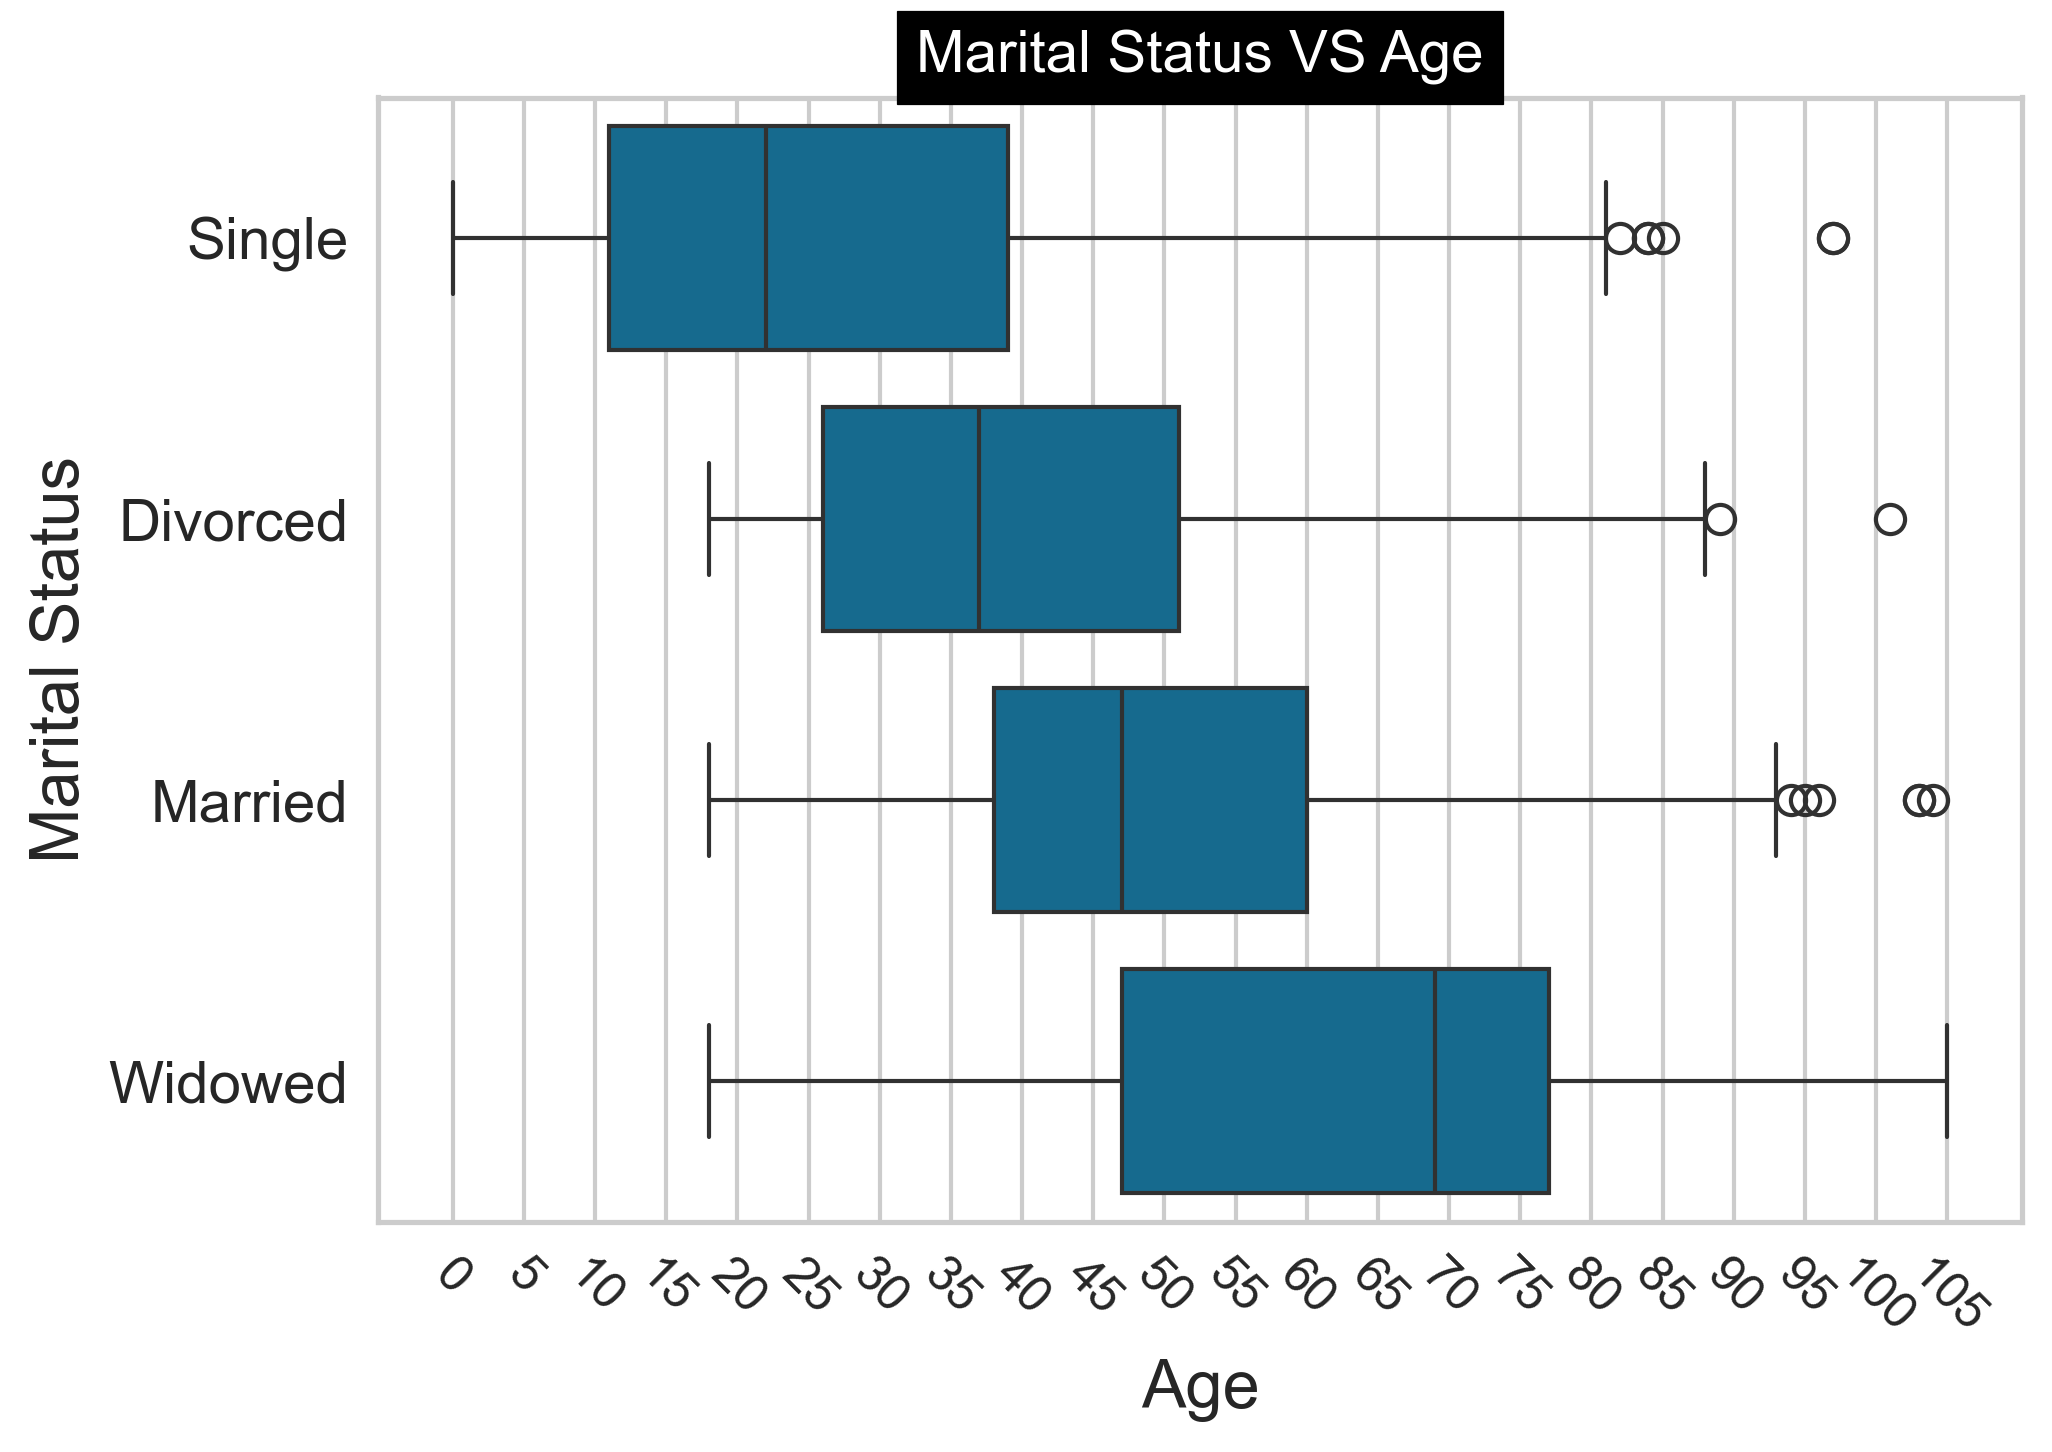

In [90]:
# Set the figure size and DPI
plt.figure(figsize=(7, 5), dpi=300)
# Create a boxplot
sns.boxplot(data=df, x='Age', y='Marital Status')
# Customize x-axis ticks
plt.xticks(range(0, 110, 5))
# Set plot title, x-axis label, and y-axis label
plt.title('Marital Status VS Age', backgroundcolor='black', color='white', fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Marital Status', fontsize=16)
# Increase the font size of x and y ticks
plt.xticks(fontsize=12, rotation=-45)
plt.yticks(fontsize=14)
# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()


**Justifying the Outlier**

Given the legal marriage age of 18, anyone over this age can be single, married, widowed, or divorced, as widowhood depends on several factors. Furthermore, it's entirely plausible for someone to be single past 85, married beyond 100, or widowed after 96, without these cases being considered outliers.







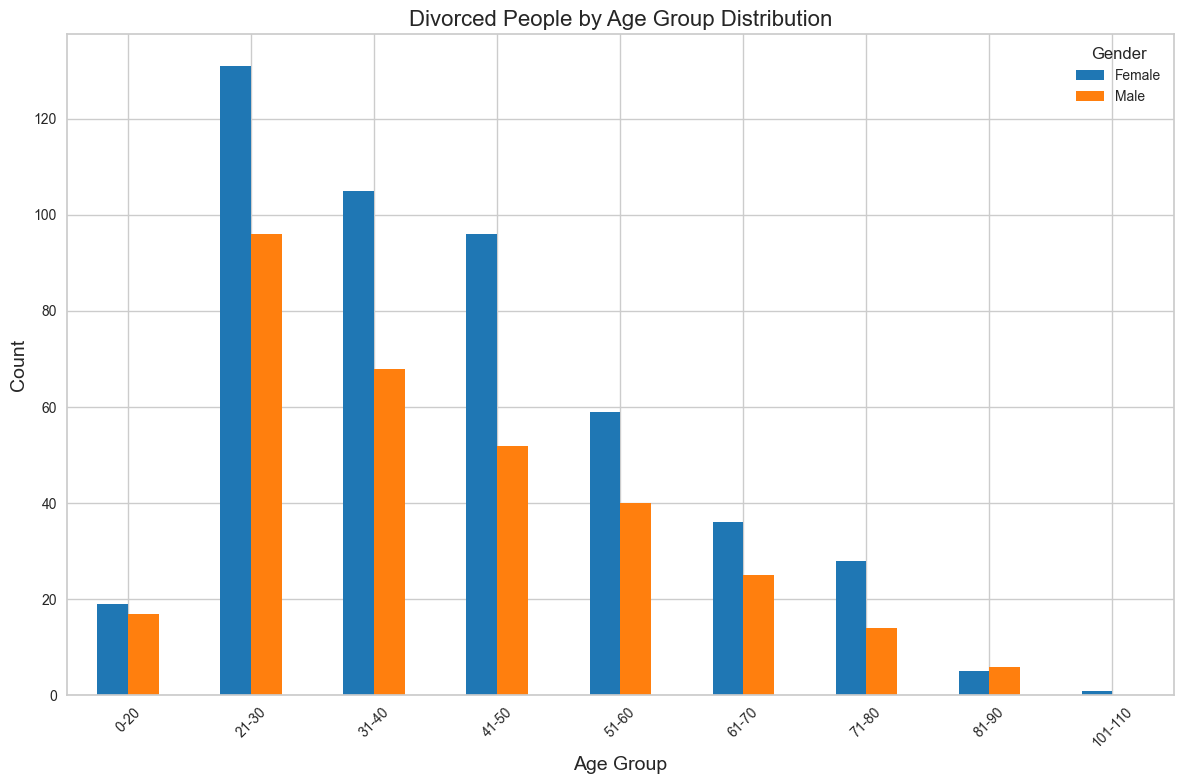

In [91]:
# Filter DataFrame for individuals who are divorced and create a copy
divorced_df = df[df["Marital Status"] == "Divorced"].copy()

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']

# Apply these bins to create age groups for the divorced DataFrame
divorced_df['Age Group'] = pd.cut(divorced_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Creating a crosstab for plotting
age_gender_crosstab = pd.crosstab(index=divorced_df['Age Group'], columns=divorced_df['Gender'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_gender_crosstab.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Divorced People by Age Group Distribution', fontsize=16)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


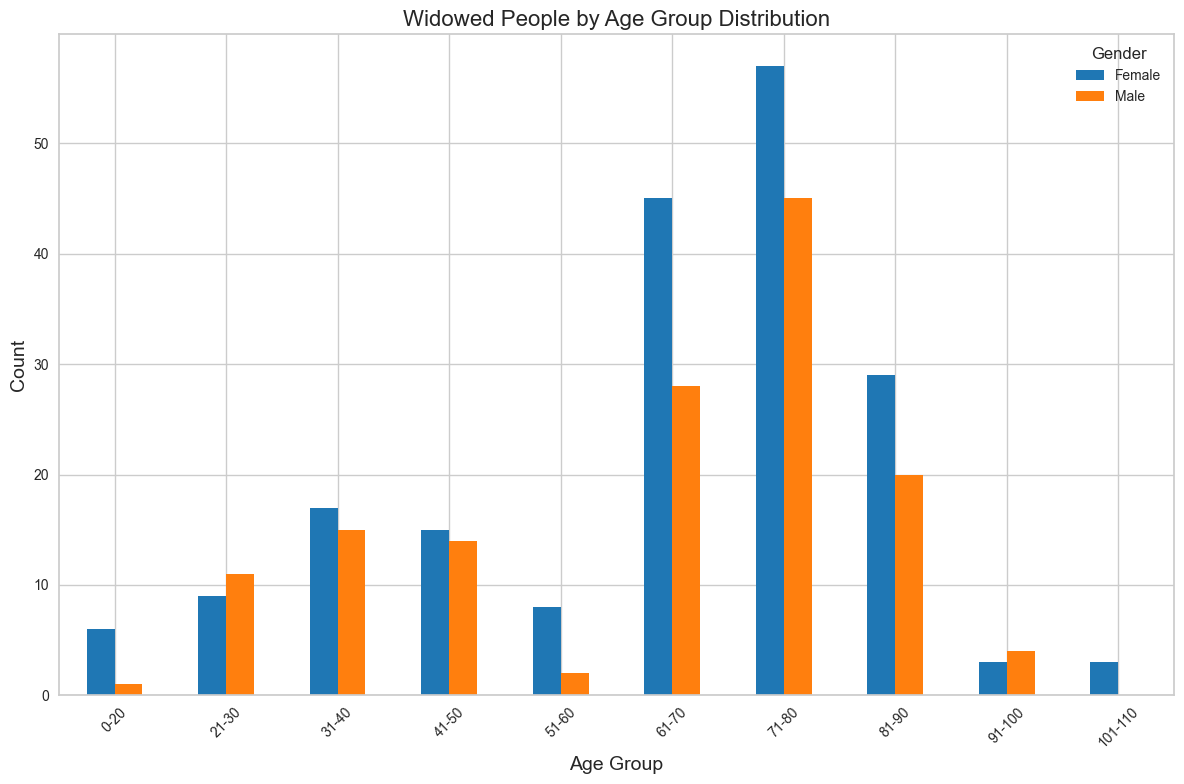

In [92]:
# Filter DataFrame for individuals who are widowed and create a copy
widowed_df = df[df["Marital Status"] == "Widowed"].copy()

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']

# Apply these bins to create age groups for the widowed DataFrame
widowed_df['Age Group'] = pd.cut(widowed_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Creating a crosstab for plotting
age_gender_crosstab = pd.crosstab(index=widowed_df['Age Group'], columns=widowed_df['Gender'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_gender_crosstab.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Widowed People by Age Group Distribution', fontsize=16)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


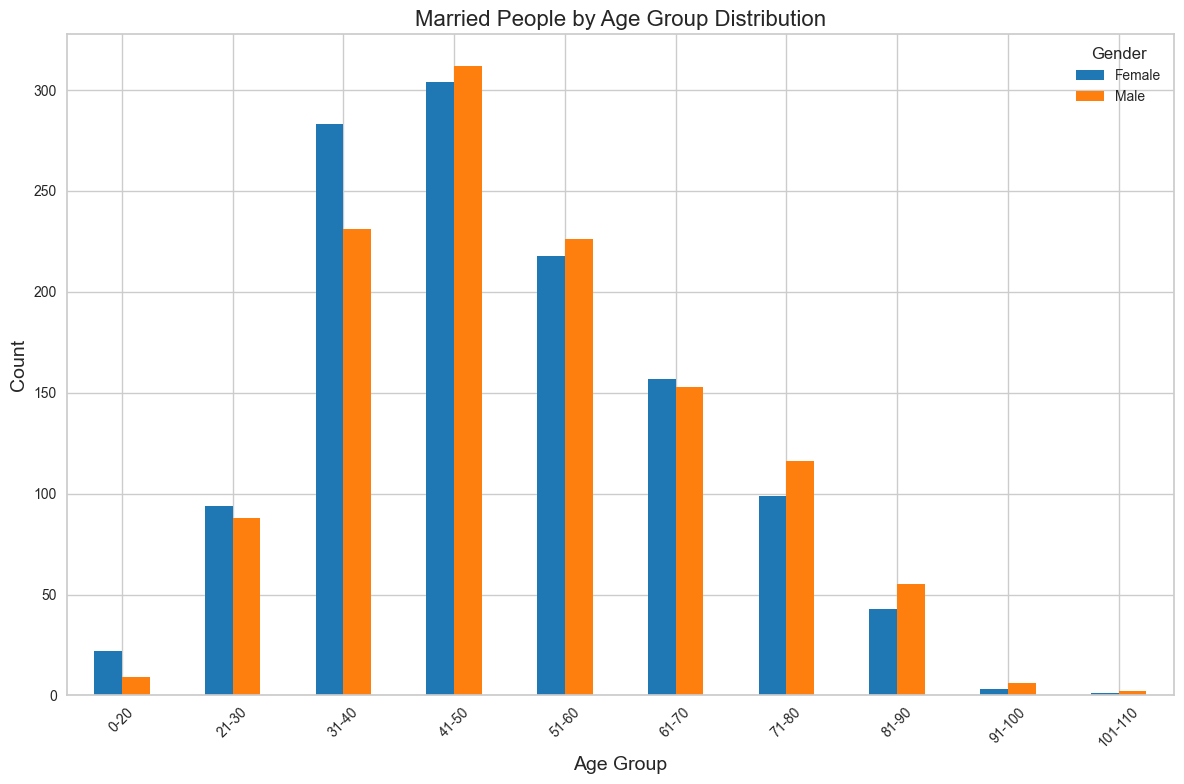

In [93]:
# Filter DataFrame for individuals who are married
married_df = df[df["Marital Status"] == "Married"].copy()  # Make a copy to avoid SettingWithCopyWarning

# Define age bins and labels (if not already defined in your workflow)
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']

# Apply these bins to create age groups for the DataFrame
married_df['Age Group'] = pd.cut(married_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Creating a crosstab for plotting
age_gender_crosstab = pd.crosstab(index=married_df['Age Group'], columns=married_df['Gender'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_gender_crosstab.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])  # Colors can be customized

# Customizing the plot
ax.set_title('Married People by Age Group Distribution', fontsize=16)
ax.set_xlabel('Age Group', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(age_gender_crosstab.index, rotation=0)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show plot
plt.tight_layout()
plt.show()


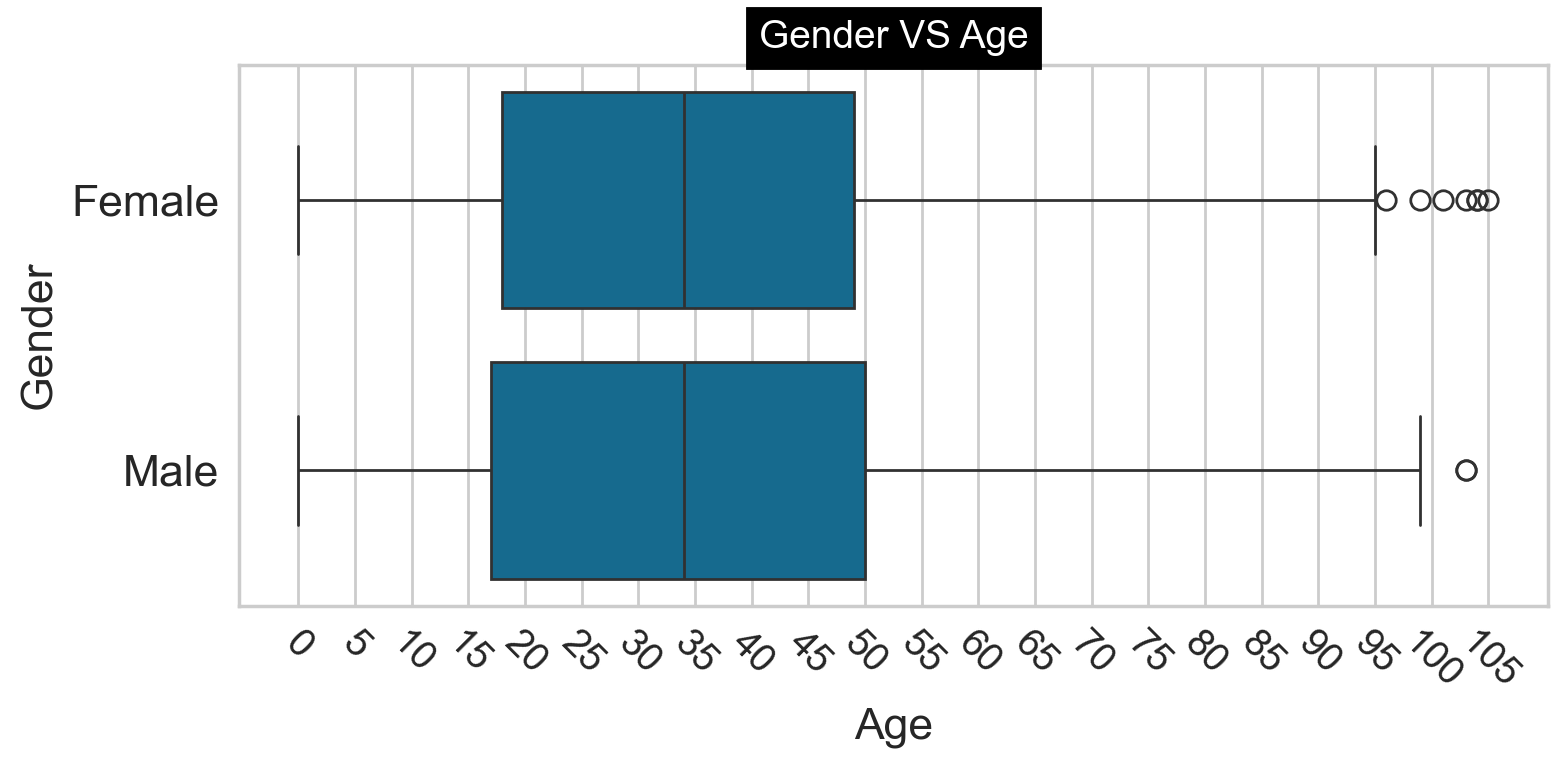

In [94]:
plt.figure(figsize=(8, 4), dpi=200)
# Create a boxplot
sns.boxplot(data=df, x='Age', y='Gender')
# Customize x-axis ticks
plt.xticks(range(0, 110, 5))
# Set plot title, x-axis label, and y-axis label
plt.title('Gender VS Age', backgroundcolor='black', color='white', fontsize=14)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Gender', fontsize=16)
# Increase the font size of x and y ticks
plt.xticks(fontsize=14, rotation=-45)
plt.yticks(fontsize=16)
# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

C:\Users\boluw\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



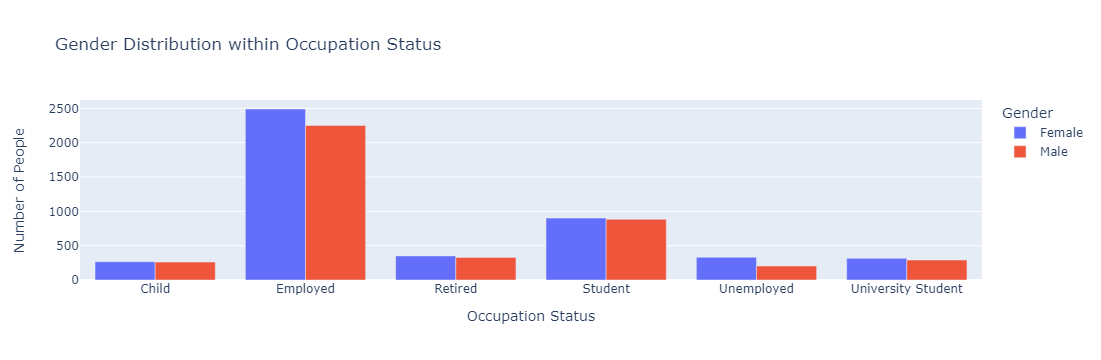

In [103]:
ctab = pd.crosstab(df['Occupation Status'], df['Gender'])

ctab_reset = ctab.reset_index()
ctab_melted = ctab_reset.melt(id_vars='Occupation Status', value_name='Count', var_name='Gender')

# Creating an interactive bar chart
fig = px.bar(ctab_melted, x='Occupation Status', y='Count', color='Gender', barmode='group',
             title='Gender Distribution within Occupation Status',
             labels={'Count': 'Number of People', 'Occupation': 'Occupation', 'Gender': 'Gender'})
fig.show()

In [504]:
# Grouping the data by 'Age Group' and 'Occupation Status' and counting occurrences
grouped_data = df.groupby(['Age Group', 'Occupation Status']).size().reset_index(name='Counts')

# Pivot the data for easier plotting: rows are 'Age Group', columns are 'Occupation Status', values are 'Counts'
pivot_table = grouped_data.pivot(index='Age Group', columns='Occupation Status', values='Counts')
pivot_table = pivot_table.fillna(0)  # Fill NaN values with zero if any


C:\Users\boluw\AppData\Local\Temp\ipykernel_6548\2445621502.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\boluw\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\boluw\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



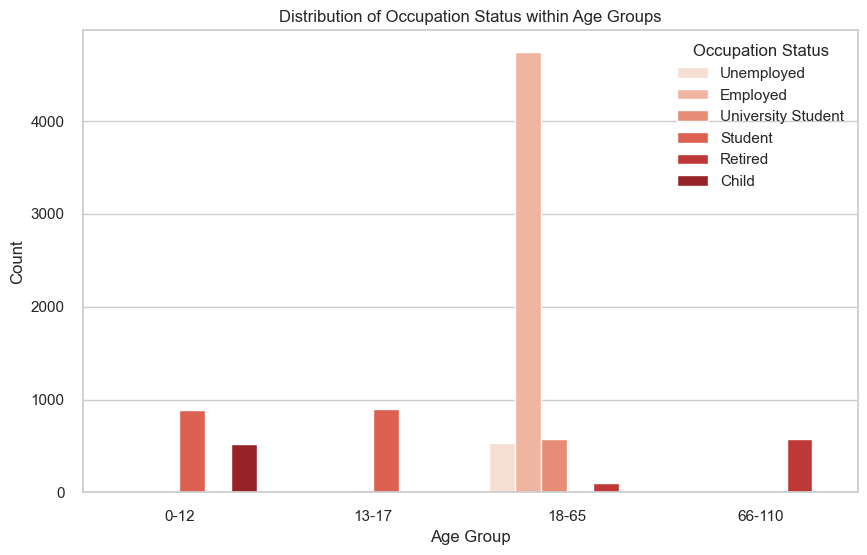

In [505]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a count plot using seaborn with 'Age Group' on the x-axis and 'Occupation Status' as hue
ax = sns.countplot(data=df, x='Age Group', hue='Occupation Status', palette='Reds')

# Set the title of the plot
ax.set_title('Distribution of Occupation Status within Age Groups')

# Set the x-axis label
plt.xlabel('Age Group')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()


**Upskilling Initiatives for Unemployed Adults: Recommendations for Employment and Training Programs**

Given the minimal population of unemployed adults in the dataset, it presents an opportune moment to introduce government-funded training schemes aimed at upskilling and reintegrating them into the workforce. These initiatives should encompass vocational training, apprenticeships, and adult education courses, ensuring individuals acquire new skills to enhance their employability and secure meaningful employment opportunities.







**Anticipating Future Needs: Suggestions for Enhancing End-of-Life Care Funding Amidst Aging Population Trends**

Considering the anticipated growth in the retired senior population over time, it's prudent to establish comprehensive, long-term strategies for healthcare infrastructure and funding. Additionally, directing resources towards community-based services that facilitate aging in place, such as home care assistance, transportation services, and meal delivery programs, is imperative for addressing the evolving needs of the aging population.

In [506]:
# Count students
student_count = df[df['Occupation Status'] == 'University Student'].shape[0]

print(f"Total number of students in the dataset: {student_count}")


Total number of students in the dataset: 606


In [507]:
# Count students
student_count = df[df['Occupation Status'] == 'Student'].shape[0]

print(f"Total number of students in the dataset: {student_count}")


Total number of students in the dataset: 1784


**Enhancing Educational Investment to Support Growing Student Population**

To address the burgeoning population of school-aged children, it's essential to boost investment in education. This entails allocating additional resources towards expanding school infrastructure, hiring more qualified teachers, implementing innovative educational programs, and enhancing access to educational materials and technology. This proactive approach ensures that the educational system can effectively accommodate the growing student population and maintain high standards of learning and development.




In [508]:
# Count the number of occurrences for each street
street_counts = df['Street'].value_counts().nlargest(15)

# Filter the DataFrame to only include the top 15 streets
top_streets_df = df[df['Street'].isin(street_counts.index)]

# Group by 'Street Name' and 'Gender' and count occurrences
gender_distribution = top_streets_df.groupby(['Street', 'Age Group']).size().unstack(fill_value=0)


C:\Users\boluw\AppData\Local\Temp\ipykernel_6548\441292318.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



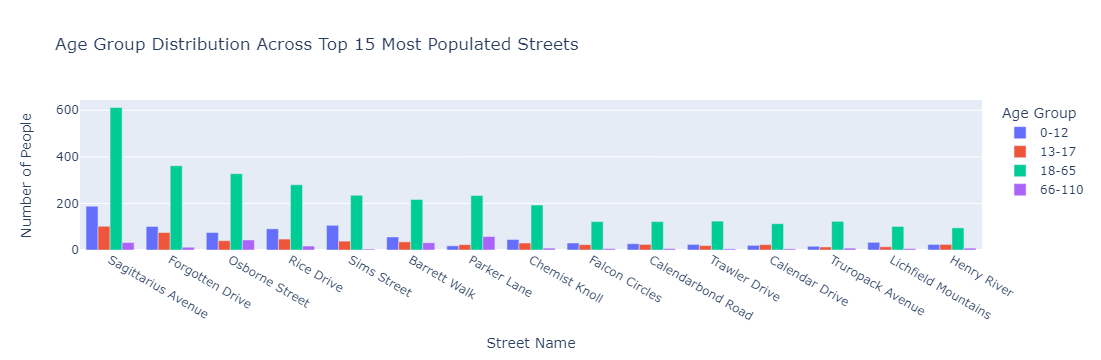

In [509]:
# Create a bar chart
fig = px.bar(gender_distribution, 
             title="Age Group Distribution Across Top 15 Most Populated Streets",
             labels={"value": "Count", "variable": "Age Group"},
             barmode='group')

# Update layout if necessary
fig.update_layout(xaxis_title="Street Name",
                  yaxis_title="Number of People",
                  xaxis={'categoryorder':'total descending'})

(fig)


In [510]:
# Count the number of occurrences for each street
street_counts = df['Street'].value_counts().nlargest(15)

# Filter the DataFrame to only include the top 15 streets
top_streets_df = df[df['Street'].isin(street_counts.index)]

# Group by 'Street Name' and 'Gender' and count occurrences
gender_distribution = top_streets_df.groupby(['Street', 'Gender']).size().unstack(fill_value=0)


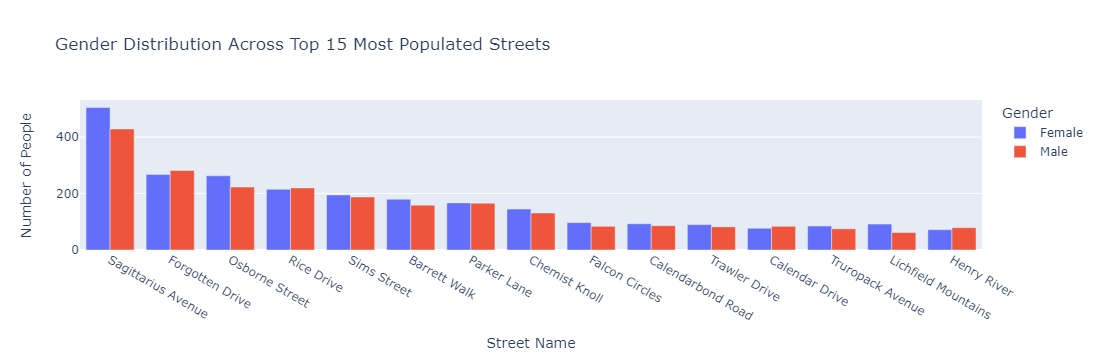

In [511]:
# Create a bar chart
fig = px.bar(gender_distribution, 
             title="Gender Distribution Across Top 15 Most Populated Streets",
             labels={"value": "Count", "variable": "Gender"},
             barmode='group')

# Update layout if necessary
fig.update_layout(xaxis_title="Street Name",
                  yaxis_title="Number of People",
                  xaxis={'categoryorder':'total descending'})

(fig)

**Strategic Infrastructure Development in Growing Communities**

Investing in general infrastructure is crucial for accommodating the needs of a growing population. While Sagittarius Avenue may currently have the highest population density, neglecting other areas could lead to disparities in access to essential services and hinder overall town development. It's important to assess the infrastructure needs of all areas and allocate resources accordingly to ensure equitable growth and development across the town.





